In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# reading data set (Salary_Data.csv) using pandas

df = pd.read_csv("C://Users//FARNANDO//Downloads//Salary_Data.csv")

In [3]:
## Now some Eploratory Data Analysis EDA

# Checking first five rows  

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Data set information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
# Data Set statistical information

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# isnull() check if there is any null (missing) value

df.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
# summing up all null value if there is any

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

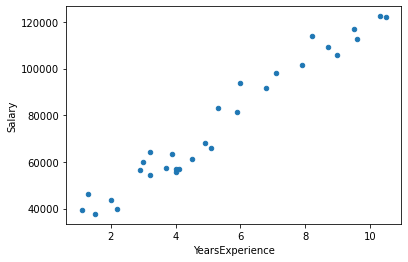

In [8]:
# Visualize data with matplotlib

df.plot('YearsExperience' , 'Salary' , kind = 'scatter')
plt.show()

In [9]:
# Now Splitting Data --- Train and Test Data

X = df['YearsExperience']
y = df['Salary']



In [10]:
# importing sklearn and using train_test_split to split data

from sklearn.model_selection import train_test_split
 

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state=100)

# test_size=0.2 means we select 20% for test data
# remaining 80% for train data



In [11]:
# Now check the dimension of train and test data and modify with correct dimension

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24,)
(6,)
(24,)
(6,)


In [12]:
print(X_train.ndim)
print(X_test.ndim)
print(y_train.ndim)
print(y_test.ndim)

1
1
1
1


In [13]:
# We have to convert our data into 2D otherwise Expected 2D array error occurs

X_train = X_train.values.reshape(-1 , 1)



In [14]:
X_test = X_test.values.reshape(-1 ,1)

In [15]:
y_train = y_train.values.reshape(-1 , 1)


In [16]:
y_test = y_test.values.reshape(-1 , 1)

In [17]:
# Verify if all train and test shapes become 2D

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24, 1)
(6, 1)


# Introducing Models


# 1.  Linear Regression

In [18]:
# Importing Linear Regression 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
# Training model by introducing training data in lr.fit

lr.fit(X_train , y_train)  


LinearRegression()

In [20]:
# Now Prediction

ylr_pred = lr.predict(X_test)
ylr_pred

array([[ 61455.19576289],
       [115749.67082676],
       [123238.56393901],
       [ 65199.64231902],
       [ 53966.30265063],
       [ 64263.53067999]])

In [21]:
# Importing regression matrices for mean_absoulute_error and r2_score

from sklearn.metrics import mean_absolute_error as mae , r2_score

lr_mae = mae(y_test , ylr_pred)
lr_mae

4072.3265372536903

In [22]:
# Check thr r2 score for accuracy of model

lr_r2 = r2_score(y_test , ylr_pred)

print(lr_r2)  

print(round(lr_r2*100 , 2) , '%')

0.9720725422361338
97.21 %


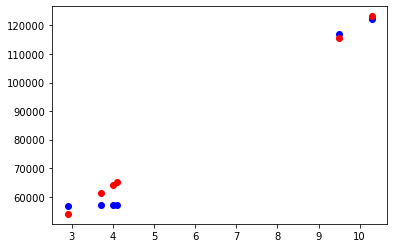

In [23]:
# ploting Actual vs Predicted values

plt.scatter(x=X_test , y=y_test , color='b' )
plt.scatter(x=X_test , y=ylr_pred , color='r' )

plt.show()

# Plotting the Best-fit Line

Formula for the Linear Regression in this case: 

           Salary = β0 + β1*(Experience)

where,           
β0 = intercept => Salary when experience is 0

β1 = slope => increase in Salary with unit increase in Experience

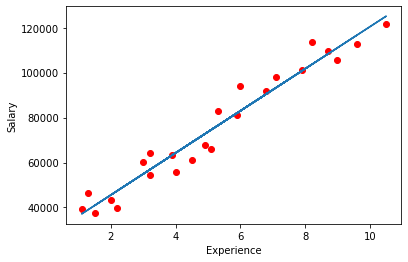

In [24]:
plt.scatter(x=X_train , y=y_train , color='r')
plt.plot(X_train,lr.predict(X_train))
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()


In [25]:
# Now to predict Salary at any given Experience

print(lr.predict([[12]]))   
print(lr.predict([[15]]))
print(lr.predict([[20]]))
print(lr.predict([[25]]))

# Double bracket make Experience value in 2D array
# other wise Expected 2D error will occur

[[139152.46180256]]
[[167235.81097353]]
[[214041.39292513]]
[[260846.97487674]]


## Intercept and coefficient of line   
## Salary = β0 + β1*(Experience)

In [26]:
# Intercept and coefficient

print('Intercept of the model β0:' , lr.intercept_)
print('Coefficient of the line β1' , lr.coef_)

Intercept of the model β0: [26819.0651187]
Coefficient of the line β1 [[9361.11639032]]


# Final equation becomes

##         Salary = 26819 + 9361*Experience
         
##          y = 26819 + 9361x